# Vaisala Data

# vaisala data: incomplete
- file name is "/data/edworak/E_Dworak_ltg 2.txt"

## imports 

In [2]:
import os
import subprocess
import geopandas

import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import metpy  
import xarray
import pandas as pd
import scipy.stats as ss 

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from IPython.display import HTML
import matplotlib.patches as mpatches
from shapely import geometry
from textwrap import wrap


use filezilla to load in data 

- load in data to save to format within file that is easy to read 
- load in save as binary file (matlab is binary file), then load that file
- can load in only what I want within the for loop 
- can read in file at once at start, or load it in like this then save it as usable format 

https://www.geeksforgeeks.org/how-to-read-large-text-files-in-python/ 

### read specific part of large file in python 
You can seek into the file the file and then read a certain amount from there. Seek allows you to get to a specific offset within a file, and then you can limit your read to only the number of bytes in that range.

with open(filename) as fin: <br>
    fin.seek(start_index) <br>
    data = fin.read(end_index - start_index)
    
Syntax: f.seek(offset, from_what), where f is file pointer <br>
Parameters: <br>
Offset: Number of positions to move forward <br>
from_what: It defines point of reference.<br>
Returns: Return the new absolute position.<br>

## load in and process data: pandas read csv
data=pandas.read_csv(‘filename.txt’, sep=’ ‘, header=None, names=[“Column1”, “Column2”])

In [2]:
data = pd.read_csv("/data2/edworak/data/E_Dworak_ltg 2.txt", names = ["Date", "Time", "lat", "lon", "peak-current", "C or G"], delim_whitespace = True, skiprows = 2)
data

,Date,Time,lat,lon,peak-current,C or G
0,2017-05-01,00:14:33.983,55.0810,-117.9915,-12.6,C
1,2017-05-01,00:14:37.903,55.3070,-116.3315,48.0,G
2,2017-05-01,00:14:37.905,55.2638,-116.3651,56.6,G
3,2017-05-01,00:17:10.756,55.2529,-116.3731,77.3,G
4,2017-05-01,00:17:10.812,55.2517,-116.3712,-9.2,G
...,...,...,...,...,...,...
6639965,2021-09-30,23:53:25.039,53.5658,-120.0736,8.4,C
6639966,2021-09-30,23:53:25.057,53.5904,-120.0671,3.6,C
6639967,2021-09-30,23:53:25.058,53.5800,-120.0849,66.3,G
6639968,2021-09-30,23:53:25.083,53.5781,-120.0903,-8.8,C


In [3]:
data[["year", "month", "day"]] = data["Date"].str.split("-", expand = True)
data[["hour", "minute", "second"]] = data["Time"].str.split(":", expand = True)
data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['day'] = data['day'].astype('int')
data['hour'] = data['hour'].astype('int')
data['minute'] = data['minute'].astype('int')
data_split = data[["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "C or G"]]

data_split

,year,month,day,hour,minute,second,lat,lon,peak-current,C or G
0,2017,5,1,0,14,33.983,55.0810,-117.9915,-12.6,C
1,2017,5,1,0,14,37.903,55.3070,-116.3315,48.0,G
2,2017,5,1,0,14,37.905,55.2638,-116.3651,56.6,G
3,2017,5,1,0,17,10.756,55.2529,-116.3731,77.3,G
4,2017,5,1,0,17,10.812,55.2517,-116.3712,-9.2,G
...,...,...,...,...,...,...,...,...,...,...
6639965,2021,9,30,23,53,25.039,53.5658,-120.0736,8.4,C
6639966,2021,9,30,23,53,25.057,53.5904,-120.0671,3.6,C
6639967,2021,9,30,23,53,25.058,53.5800,-120.0849,66.3,G
6639968,2021,9,30,23,53,25.083,53.5781,-120.0903,-8.8,C


## June and July 2021 Data

In [4]:
data_2021_6 = data_split.loc[(data_split["year"] == 2021) & (data_split["month"] == 6) & (data_split["day"] >= 29)]
data_2021_7 = data_split.loc[(data_split["year"] == 2021) & (data_split["month"] == 7)& (data_split["day"] <= 2)]
frames = [data_2021_6, data_2021_7]
data_2021= pd.concat(frames)
data_2021

,year,month,day,hour,minute,second,lat,lon,peak-current,C or G
5305659,2021,6,29,0,0,00.999,58.0330,-122.2078,9.0,C
5305660,2021,6,29,0,0,01.113,57.7867,-123.3619,6.7,C
5305661,2021,6,29,0,0,14.823,57.9867,-122.3275,5.5,C
5305662,2021,6,29,0,0,25.591,58.0317,-122.3642,7.1,C
5305663,2021,6,29,0,0,25.599,58.0018,-122.3158,-5.8,G
...,...,...,...,...,...,...,...,...,...,...
5964556,2021,7,2,23,59,13.750,52.1498,-115.7768,-7.5,C
5964557,2021,7,2,23,59,16.171,52.7930,-116.9315,7.7,C
5964558,2021,7,2,23,59,19.003,52.2367,-115.0502,2.0,C
5964559,2021,7,2,23,59,27.786,52.6734,-116.9395,-5.3,C


## Pyrocb Data: June 30 23 UTC - July 1 4 UTC

In [5]:
data_30 = data_2021.loc[(data_2021["day"] == 30) & (data_2021["hour"] >= 23) & (data_2021.lon >= -121.5) & (data_2021.lon <= -120) & (data_2021.lat >= 51) & (data_2021.lat <= 53)]
data_1 = data_2021.loc[(data_2021["day"] == 1) & (data_2021["hour"]<= 2) & (data_2021.lon >= -121.5) & (data_2021.lon <= -119) & (data_2021.lat >= 51) & (data_2021.lat <= 53)]
frames = [data_30, data_1]
data_pyrocb1 = pd.concat(frames)
data_pyrocb1

,year,month,day,hour,minute,second,lat,lon,peak-current,C or G
5430367,2021,6,30,23,30,34.951,52.0491,-121.2132,-7.2,G
5430498,2021,6,30,23,53,17.779,52.0220,-121.3170,-4.4,C
5430706,2021,7,1,0,2,47.551,52.0208,-120.9686,2.9,C
5431957,2021,7,1,0,25,40.011,52.0128,-120.9248,3.9,C
5432292,2021,7,1,0,30,10.071,52.0214,-120.9098,2.3,C
...,...,...,...,...,...,...,...,...,...,...
5453399,2021,7,1,2,57,26.291,52.1655,-120.8396,4.6,C
5453916,2021,7,1,2,58,54.288,52.2016,-120.8395,2.1,C
5453917,2021,7,1,2,58,54.289,52.2035,-120.8673,3.2,C
5454245,2021,7,1,2,59,51.535,52.2293,-120.8299,-3.3,C


### pyrocb for loop

In [6]:
hours = [22.0, 23.0, 0.0, 1.0, 2.0]
mins = range(0, 60, 10)

# all_strikes_pyrocb1 = []
empty_hours_pyrocb1 = []
empty_strikes_pyrocb1 = []
all_strikes_pyrocb_flat = []
num_strikes_pyrocb1 = np.zeros((len(hours), len(mins)))
mean_current_pyrocb1 = np.zeros((len(hours), len(mins)))
mean_pos_current_pyrocb1 = np.zeros((len(hours), len(mins)))
mean_neg_current_pyrocb1 = np.zeros((len(hours), len(mins)))
percent_pos_current_pyrocb1 = np.zeros((len(hours), len(mins)))
num_pos_current_pyrocb1 =  np.zeros((len(hours), len(mins)))
num_neg_current_pyrocb1 =  np.zeros((len(hours), len(mins)))
cloud_pyrocb1 =  np.zeros((len(hours), len(mins)))
cloud_ground_pyrocb1 =  np.zeros((len(hours), len(mins)))
pos_cloud_ground_pyrocb1 =  np.zeros((len(hours), len(mins)))
neg_cloud_ground_pyrocb1 =  np.zeros((len(hours), len(mins)))
pos_cloud_pyrocb1 =  np.zeros((len(hours), len(mins)))
neg_cloud_pyrocb1 =  np.zeros((len(hours), len(mins)))

def alldays_function(data_pyrocb1):
        for i in range(len(hours)): 
            for j in range(len(mins)): 
                
                    strikes_pyrocb1 = data_pyrocb1.loc[(data_pyrocb1.hour == hours[i]) & (data_pyrocb1.minute >= mins[j]) & (data_pyrocb1.minute <= mins[j] + 9) & (data_pyrocb1.lon >= -121.5) & (data_pyrocb1.lon <= -120) & (data_pyrocb1.lat >= 51) & (data_pyrocb1.lat <= 53)]

                    if len(strikes_pyrocb1) >= 1: 
                        all_strikes_pyrocb1 = np.append(empty_strikes_pyrocb1, strikes_pyrocb1["peak-current"])
                        hours_pyrocb1 = np.append(empty_hours_pyrocb1, strikes_pyrocb1["hour"], axis = 0)
                        num_strikes_pyrocb1[i,j] = len(strikes_pyrocb1)
                        mean_current_pyrocb1[i,j] = np.mean(abs(strikes_pyrocb1["peak-current"]))

                        pos_current_pyrocb1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] > 0)]
                        num_pos_current_pyrocb1[i,j]= len(pos_current_pyrocb1)
                        mean_pos_current_pyrocb1[i,j] = pos_current_pyrocb1["peak-current"].mean()

                        neg_current_pyrocb1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] < 0)]
                        num_neg_current_pyrocb1[i,j] = len(neg_current_pyrocb1)
                        mean_neg_current_pyrocb1[i,j] = neg_current_pyrocb1["peak-current"].mean()
                        
                        cloud_count1 = strikes_pyrocb1.loc[(strikes_pyrocb1["C or G"] == "C")]
                        cloud_pyrocb1[i,j] = len(cloud_count1)
                        pos_cloud_count1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] > 0) & (strikes_pyrocb1["C or G"] == "C")]
                        pos_cloud_pyrocb1[i,j] = len(pos_cloud_count1)
                        neg_cloud_count1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] < 0) & (strikes_pyrocb1["C or G"] == "C")]
                        neg_cloud_pyrocb1[i,j] = len(neg_cloud_count1)
                        
                        ground_count1 = strikes_pyrocb1.loc[(strikes_pyrocb1["C or G"] == "G")]
                        cloud_ground_pyrocb1[i, j] = len(ground_count1)
                        pos_cloud_ground_count1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] > 0) & (strikes_pyrocb1["C or G"] == "G")]
                        pos_cloud_ground_pyrocb1[i,j] = len(pos_cloud_ground_count1)
                        neg_cloud_ground_count1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] < 0) & (strikes_pyrocb1["C or G"] == "G")]
                        neg_cloud_ground_pyrocb1[i,j] = len(neg_cloud_ground_count1)
                       
                        if len(strikes_pyrocb1) > 2: 
                            percent_pos_current_pyrocb1[i,j] = (len(pos_current_pyrocb1["peak-current"]) / len(strikes_pyrocb1)) * 100

        return(num_strikes_pyrocb1, percent_pos_current_pyrocb1,  num_pos_current_pyrocb1, num_neg_current_pyrocb1, 
            mean_current_pyrocb1, mean_pos_current_pyrocb1, mean_neg_current_pyrocb1, cloud_pyrocb1, 
            cloud_ground_pyrocb1, pos_cloud_pyrocb1,  neg_cloud_pyrocb1, pos_cloud_ground_pyrocb1,  neg_cloud_ground_pyrocb1,
            all_strikes_pyrocb1, hours_pyrocb1)



In [7]:
d = {}

names = ["num_strikes_pyrocb1", "percent_pos_current_pyrocb1", "num_pos_current_pyrocb1", "num_neg_current_pyrocb1", 
           "mean_current_pyrocb1", "mean_pos_current_pyrocb1", "mean_neg_current_pyrocb1", "cloud_pyrocb1",
         "cloud_ground_pyrocb1", "pos_cloud_pyrocb1",  "neg_cloud_pyrocb1", "pos_cloud_ground_pyrocb1",  "neg_cloud_ground_pyrocb1"]


for i in range(0, len(names)):
    a = alldays_function(data_pyrocb1)[i]
    b = [item for sublist in a for item in sublist]
    d[names[i]] = b
print(d["num_strikes_pyrocb1"][17:])    
print(np.mean(d["percent_pos_current_pyrocb1"][17:]))
print(d["cloud_ground_pyrocb1"])

[7.0, 14.0, 29.0, 14.0, 17.0, 24.0, 28.0, 99.0, 61.0, 20.0, 5.0, 6.0, 18.0]
85.74201946462777
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.0, 6.0, 3.0, 6.0, 2.0, 0.0, 0.0, 1.0, 0.0]


## Pyrocb map

In [8]:
def pyrocb_subregion_box(ax, subregion):
    geom = geometry.box(minx=-121.5,maxx=-120,miny=51,maxy=53)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax

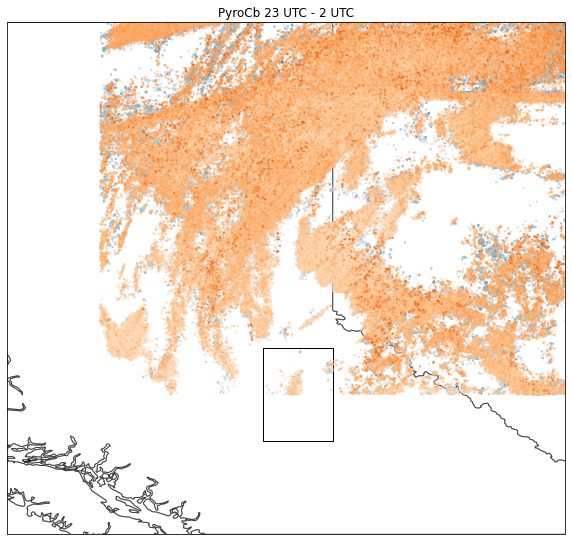

In [9]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

# Make figure larger
plt.xlim([-127, -115])
plt.ylim([49, 60])

points_pos = (data_2021.loc[(data_2021.lon > -130) & (data_2021.lon < -100) & (data_2021.lat > 49) & (data_2021.lat < 60) & (data_2021["peak-current"] > 0)])
points_neg = (data_2021.loc[(data_2021.lon > -130) & (data_2021.lon < -100) & (data_2021.lat > 49) & (data_2021.lat < 60) & (data_2021["peak-current"] < 0) ])
pyrocb_subregion_box(ax, points_pos)

#negative polarity 
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = 5, edgecolors="none", marker = 'o', alpha=0.5)
#positive polarity
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = 5, edgecolors="none", marker = 'o', alpha=0.5)

plt.title("PyroCb 23 UTC - 2 UTC")
plt.savefig("pos_neg_map", dpi = 200)

plt.show()

## histogram

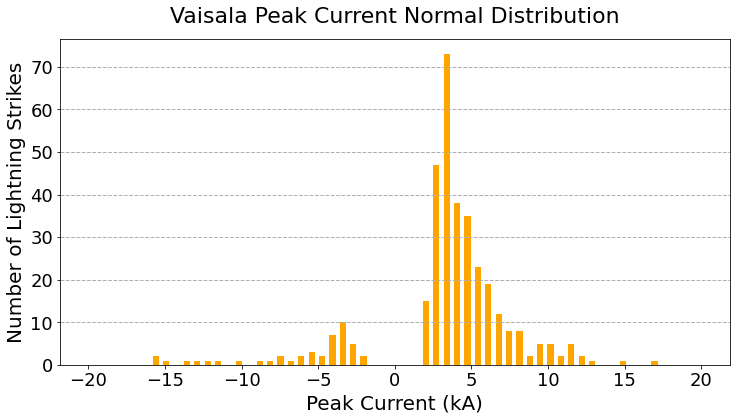

In [10]:
fig = plt.figure(figsize=(12,6))

weights = np.ones_like(data_pyrocb1["peak-current"]) / len(data_pyrocb1["peak-current"])

colors = ["orange"]

bins = np.linspace(-20, 20, 60)
#bins=[-100, -50, -25, 0, 25, 50, 100, 200]
#  weights = [weights],
plt.hist([data_pyrocb1["peak-current"]], bins, alpha = 1, histtype='bar', color=colors, rwidth=0.6) 

plt.grid(axis='y', linestyle='--', linewidth=1)
#plt.tight_layout()
plt.title("Vaisala Peak Current Normal Distribution", fontsize = 22, y = 1.03)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("pyrocb_histogram", dpi = 200)
plt.show()


## time series

KeyError: 'percent_pos_current_pyrocb'

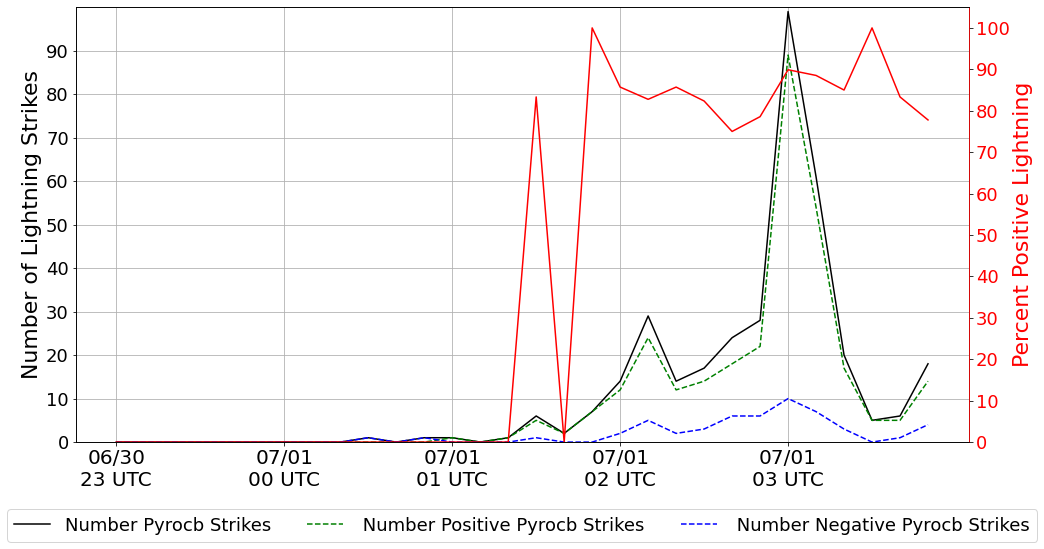

In [11]:

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 30, 1)
xticks = np.arange(0, 30, 6)
yticks = np.arange(0, 100, 10)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["num_strikes_pyrocb1"], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, d["num_pos_current_pyrocb1"], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, d["num_neg_current_pyrocb1"], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,100))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 105, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb1"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,105))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_pyrocb"][15:])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("Vaisala PyroCb Lightning Strike Count and Polarity", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## cloud and cloud to ground count

In [ ]:

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 30, 1)
xticks = np.arange(0, 30, 6)
yticks = np.arange(0, 100, 10)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["num_strikes_pyrocb"], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, d["cloud_pyrocb"], "g--", label = " Number Cloud to Cloud Strikes")
ax.plot(xValues, d["cloud_ground_pyrocb"], "b--", label = " Number Cloud to Ground Strikes")

ax.set_ylim((0,100))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 105, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,105))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_pyrocb"][15:])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("Vaisala PyroCb Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## C and CG boxplot

In [ ]:
np.sum(d["pos_cloud_pyrocb"])

In [ ]:
# "pos_cloud_pyrocb",  "neg_cloud_pyrocb", "pos_cloud_ground_pyrocb",  "neg_cloud_ground_pyrocb"

fig, ax = plt.subplots(figsize = (10,6))

ax.set_title('Cloud and Cloud to Ground Polarity', fontsize = 20, y = 1.05)
ax.set_ylabel("Lightning Count", fontsize = 18)

labels = ["Positive C-C", "Negative C-C", "Positive C-G", 'Negative C-G'] 

ax.set_xticklabels(labels, fontsize = 16)

plt.yticks(fontsize = 16)
plt.ylim(-5, 35)

plt.axhline(y=0,  linestyle='-')

plt.annotate("{:,}".format(np.sum(d["pos_cloud_pyrocb"])), xy =(0.9, 30), fontsize = 14, color = "green")
plt.annotate("{:,}".format(np.sum(d["neg_cloud_pyrocb"])), xy =(1.9, 30), fontsize = 14, color = "green")
plt.annotate("{:,}".format(np.sum(d["pos_cloud_ground_pyrocb"])), xy =(2.9, 30), fontsize = 14, color = "green")
plt.annotate("{:,}".format(np.sum(d["neg_cloud_ground_pyrocb"])), xy =(3.9, 30), fontsize = 14, color = "green")


green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 16, loc = "lower center")


data = [d["pos_cloud_pyrocb"],  d["neg_cloud_pyrocb"], d["pos_cloud_ground_pyrocb"], d["neg_cloud_ground_pyrocb"]]
ax.boxplot(data, showfliers=False, showmeans = True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"})
plt.grid(linestyle='--', linewidth=1, axis='y')

plt.savefig("boxplot_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


# new vaisala data 
- 2021_2022_acdegiklmnoprstuvzACEGKLMNRST4_sc.txt

## imports 

In [ ]:
import os
import subprocess
import geopandas

import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import metpy  
import xarray
import pandas as pd
import scipy.stats as ss 

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from IPython.display import HTML
import matplotlib.patches as mpatches
from shapely import geometry
from textwrap import wrap
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as grd

## load in the data

In [ ]:
data = pd.read_csv("/data2/edworak/data/2021_2022_acdegiklmnoprstuvzACEGKLMNRST4_sc.txt", names = ["a", "c", "Date", "e", "lon", "i", "peak-current", "lat", "m", "n", "o", "polarity", "range", "signal", "time", "u", "v", "z", "A", "C", "E", "C or G", "mag_current", "lat2", "m2", "time_nano", "R", "S", "T", "latlon"], delim_whitespace = True, skiprows = 0)
data.E


In [ ]:
data2 = pd.read_csv("/data/edworak/2021_2022_acdegiklmnoprstuvzACEGKLMNRST4_sc.txt", names = ["Date", "lon","peak-current", "lat", "multi", "polarity", "range", "Time", "C or G" ], delim_whitespace = True, skiprows = 0, usecols = [3,5,7,9,10,13,14,17,24])
data2

In [ ]:
data2[["year", "month", "day"]] = data2["Date"].str.split("-", expand = True)
data2[["hour", "minute", "second"]] = data2["Time"].str.split(":", expand = True)

In [ ]:
data2['year'] = data2['year'].astype('int')
data2['month'] = data2['month'].astype('int')
data2['day'] = data2['day'].astype('int')
data2['hour'] = data2['hour'].astype('int')
data2['minute'] = data2['minute'].astype('int')
data_split2 = data2[["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "C or G", "multi", "polarity", "range"]]

data_split2

## PyroCb data

### pyrocb data 6/30 22:00 to 7/1 3:00

In [ ]:
data_30 = data_split2.loc[(data_split2["day"] == 30) & (data_split2["hour"] >= 22) & (data_split2.lon >= -121.5) & (data_split2.lon <= -119) & (data_split2.lat >= 51) & (data_split2.lat <= 53)]
data_1 = data_split2.loc[(data_split2["day"] == 1) & (data_split2["hour"]<= 3) & (data_split2.lon >= -121.5) & (data_split2.lon <= -119) & (data_split2.lat >= 51) & (data_split2.lat <= 53)]
frames = [data_30, data_1]
data_pyrocb= pd.concat(frames)
data_pyrocb

### whole region data 6/30 22:00 to 7/1 3:00

In [ ]:
data_30_all = data_split2.loc[(data_split2["day"] == 30) & (data_split2["hour"] >= 22)]
data_1_all = data_split2.loc[(data_split2["day"] == 1) & (data_split2["hour"]<= 3)]
frames_all = [data_30_all, data_1_all]
data_pyrocb_all= pd.concat(frames_all)
data_pyrocb_all

In [ ]:
pos_ground = data_pyrocb[(data_pyrocb["polarity"] == "+") & (data_pyrocb["C or G"] == "G")]
#pos_ground
# ground = data_pyrocb[(data_pyrocb["C or G"] == "G")]
# ground
#22 for + 

### for loop

In [ ]:
hours = [22.0, 23.0, 0.0, 1.0, 2.0, 3.0]
mins = range(0, 60, 10)

# all_strikes_pyrocb = []
# empty_hours_pyrocb = []
# empty_strikes_pyrocb = []
# all_strikes_pyrocb_flat = []
num_strikes_pyrocb = np.zeros((len(hours), len(mins)))
mean_current_pyrocb = np.zeros((len(hours), len(mins)))
mean_pos_current_pyrocb = np.zeros((len(hours), len(mins)))
mean_neg_current_pyrocb = np.zeros((len(hours), len(mins)))
percent_pos_current_pyrocb = np.zeros((len(hours), len(mins)))
num_pos_current_pyrocb =  np.zeros((len(hours), len(mins)))
num_neg_current_pyrocb =  np.zeros((len(hours), len(mins)))
cloud_pyrocb =  np.zeros((len(hours), len(mins)))
cloud_ground_pyrocb =  np.zeros((len(hours), len(mins)))
pos_cloud_ground_pyrocb =  np.zeros((len(hours), len(mins)))
neg_cloud_ground_pyrocb =  np.zeros((len(hours), len(mins)))
pos_cloud_pyrocb =  np.zeros((len(hours), len(mins)))
neg_cloud_pyrocb =  np.zeros((len(hours), len(mins)))
percent_pos_current_cloud_ground =  np.zeros((len(hours), len(mins)))
percent_cloud_pyrocb =  np.zeros((len(hours), len(mins)))
percent_pos_current_cloud =  np.zeros((len(hours), len(mins)))

def pyrocb_function(data_pyrocb):
        for i in range(len(hours)): 
            for j in range(len(mins)): 
                
                    strikes_pyrocb = data_pyrocb.loc[(data_pyrocb.hour == hours[i]) & (data_pyrocb.minute >= mins[j]) & (data_pyrocb.minute <= mins[j] + 9)]
                    # & (data_pyrocb.lon >= -121.5) & (data_pyrocb.lon <= -119) & (data_pyrocb.lat >= 51) & (data_pyrocb.lat <= 53)

                    if len(strikes_pyrocb) >= 1: 
                        # all_strikes_pyrocb = np.append(empty_strikes_pyrocb, strikes_pyrocb["peak-current"])
                        # hours_pyrocb = np.append(empty_hours_pyrocb, strikes_pyrocb["hour"], axis = 0)
                        num_strikes_pyrocb[i,j] = len(strikes_pyrocb)
                        mean_current_pyrocb[i,j] = np.mean(abs(strikes_pyrocb["peak-current"]))

                        pos_current_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["polarity"] == "+")]
                        num_pos_current_pyrocb[i,j]= len(pos_current_pyrocb)
                        mean_pos_current_pyrocb[i,j] = np.mean(pos_current_pyrocb["peak-current"])

                        neg_current_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["polarity"] == "-")]
                        num_neg_current_pyrocb[i,j] = len(neg_current_pyrocb)
                        mean_neg_current_pyrocb[i,j] = np.mean(neg_current_pyrocb["peak-current"])
                        
                        cloud_count = strikes_pyrocb.loc[(strikes_pyrocb["C or G"] == "C")]
                        cloud_pyrocb[i,j] = len(cloud_count)
                        pos_cloud_count = strikes_pyrocb.loc[(strikes_pyrocb["polarity"] == "+") & (strikes_pyrocb["C or G"] == "C")]
                        pos_cloud_pyrocb[i,j] = len(pos_cloud_count)
                        neg_cloud_count = cloud_count.loc[(cloud_count["polarity"] == "-")]
                        neg_cloud_pyrocb[i,j] = len(neg_cloud_count)
                        
                        ground_count = strikes_pyrocb.loc[(strikes_pyrocb["C or G"] == "G")]
                        cloud_ground_pyrocb[i, j] = len(ground_count)
                        pos_cloud_ground_count = ground_count.loc[(ground_count["polarity"] == "+")]
                        pos_cloud_ground_pyrocb[i,j] = len(pos_cloud_ground_count)
                        neg_cloud_ground_count = ground_count.loc[(ground_count["polarity"] == "-")]
                        neg_cloud_ground_pyrocb[i,j] = len(neg_cloud_ground_count)
                       
                        if len(strikes_pyrocb) > 2: 
                            percent_pos_current_pyrocb[i,j] = (len(pos_current_pyrocb["peak-current"]) / len(strikes_pyrocb)) * 100
                       
                        if len(cloud_count) > 1:    
                            # percent_pos_current_cloud_ground[i,j] = (len(pos_cloud_count["peak-current"]) / len(cloud_count)) * 100
                            percent_pos_current_cloud[i,j] = (len(pos_cloud_count["peak-current"]) / len(cloud_count)) * 100
                            percent_cloud_pyrocb[i,j] = (len(cloud_count["peak-current"]) / len(strikes_pyrocb)) * 100

                        if len(ground_count) > 1:  
                            percent_pos_current_cloud_ground[i,j] = (len(pos_cloud_ground_count["peak-current"]) / len(ground_count)) * 100
                        
        return(num_strikes_pyrocb, percent_pos_current_pyrocb, num_pos_current_pyrocb, num_neg_current_pyrocb, 
            mean_current_pyrocb, mean_pos_current_pyrocb, mean_neg_current_pyrocb, cloud_pyrocb, 
            cloud_ground_pyrocb, pos_cloud_pyrocb,  neg_cloud_pyrocb, pos_cloud_ground_pyrocb,  neg_cloud_ground_pyrocb, 
             percent_pos_current_cloud, percent_cloud_pyrocb, percent_pos_current_cloud_ground)


In [ ]:
d = {}

names30 = ["num_strikes_pyrocb", "percent_pos_current_pyrocb", "num_pos_current_pyrocb", "num_neg_current_pyrocb", 
           "mean_current_pyrocb", "mean_pos_current_pyrocb", "mean_neg_current_pyrocb", "cloud_pyrocb",
         "cloud_ground_pyrocb", "pos_cloud_pyrocb",  "neg_cloud_pyrocb", "pos_cloud_ground_pyrocb",  "neg_cloud_ground_pyrocb", 
        "percent_pos_current_cloud", "percent_cloud_pyrocb", "percent_pos_current_cloud_ground"]


for i in range(0, len(names30)):
    a30 = pyrocb_function(data_pyrocb)[i]
    b30 = [item for sublist in a30 for item in sublist]
    d[names30[i]] = b30

print(np.sum(d["pos_cloud_pyrocb"]))


### nested array pyrocb

In [ ]:
hours = [22.0, 23.0, 0.0, 1.0, 2.0, 3.0]
mins = range(0, 60, 10)
pyrocb_cloud_array = []
pyrocb_ground_array = []
pyrocb_neg_cloud_array = []
pyrocb_pos_cloud_array = []
pyrocb_neg_ground_array = []
pyrocb_pos_ground_array = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        nested_data = data_pyrocb[(data_pyrocb["hour"] == hours[i]) & (data_pyrocb["minute"] >= mins[j]) & (data_pyrocb["minute"] <= mins[j] + 9)]
        if len(nested_data) > 1: 
            pyrocb_cloud_array.append(np.array(nested_data[(nested_data["C or G"] == "C")]["peak-current"]))
            pyrocb_ground_array.append(np.array(nested_data[(nested_data["C or G"] == "G")]["peak-current"]))
            
            pyrocb_pos_cloud_array.append(np.array(nested_data[(nested_data["polarity"] == "+") & (nested_data["C or G"] == "C")]["peak-current"]))
            pyrocb_neg_cloud_array.append(np.array(nested_data[(nested_data["polarity"] == "-") & (nested_data["C or G"] == "C")]["peak-current"]))
            
            pyrocb_pos_ground_array.append(np.array(nested_data[(nested_data["polarity"] == "+") & (nested_data["C or G"] == "G")]["peak-current"]))
            pyrocb_neg_ground_array.append(np.array(nested_data[(nested_data["polarity"] == "-") & (nested_data["C or G"] == "G")]["peak-current"]))

pyrocb_cloud_flat = [item for sublist in pyrocb_cloud_array for item in sublist]
pyrocb_ground_flat = [item for sublist in pyrocb_ground_array for item in sublist]
pyrocb_neg_cloud_flat = [item for sublist in pyrocb_neg_cloud_array for item in sublist]
pyrocb_pos_cloud_flat = [item for sublist in pyrocb_pos_cloud_array for item in sublist]
pyrocb_neg_ground_flat = [item for sublist in pyrocb_neg_ground_array for item in sublist]
pyrocb_pos_ground_flat = [item for sublist in pyrocb_pos_ground_array for item in sublist]

# pyrocb_neg_cloud_flat, pyrocb_pos_cloud_flat, pyrocb_neg_ground_flat, pyrocb_pos_ground_flat


# smoke data june 29 hours 8 - 12

In [ ]:
data_smoke = data_split2.loc[(data_split2["day"] == 29) & (data_split2["hour"] >= 8) & (data_split2["hour"] <= 12) & (data_split2.lon >= -120) & (data_split2.lon <= -114) & (data_split2.lat >= 58) & (data_split2.lat <= 60.5)]
data_smoke

## smoke data june 29 hours 8 - 12 whole region 

In [ ]:
data_smoke_all = data_split2.loc[(data_split2["day"] == 29) & (data_split2["hour"] >= 8) & (data_split2["hour"] <= 12)]
data_smoke_all

### smoke for loop 

In [ ]:
hours = [8.0, 9.0, 10.0, 11.0, 12.0]
mins = range(0, 60, 10)

num_strikes_smoke = np.zeros((len(hours), len(mins)))
mean_current_smoke = np.zeros((len(hours), len(mins)))
mean_pos_current_smoke = np.zeros((len(hours), len(mins)))
mean_neg_current_smoke = np.zeros((len(hours), len(mins)))
percent_pos_current_smoke = np.zeros((len(hours), len(mins)))
num_pos_current_smoke =  np.zeros((len(hours), len(mins)))
num_neg_current_smoke =  np.zeros((len(hours), len(mins)))
cloud_smoke =  np.zeros((len(hours), len(mins)))
cloud_ground_smoke =  np.zeros((len(hours), len(mins)))
pos_cloud_ground_smoke =  np.zeros((len(hours), len(mins)))
neg_cloud_ground_smoke =  np.zeros((len(hours), len(mins)))
pos_cloud_smoke =  np.zeros((len(hours), len(mins)))
neg_cloud_smoke =  np.zeros((len(hours), len(mins)))
percent_pos_current_cloud_ground_smoke =  np.zeros((len(hours), len(mins)))
percent_pos_current_cloud_smoke =  np.zeros((len(hours), len(mins)))

def smoke_function(data_smoke):
        for i in range(len(hours)): 
            for j in range(len(mins)): 
                
                    strikes_smoke = data_smoke.loc[(data_smoke.hour == hours[i]) & (data_smoke.minute >= mins[j]) & (data_smoke.minute <= mins[j] + 9)]

                    if len(strikes_smoke) >= 1: 
                    
                        num_strikes_smoke[i,j] = len(strikes_smoke)
                        mean_current_smoke[i,j] = np.mean(abs(strikes_smoke["peak-current"]))

                        pos_current_smoke = strikes_smoke.loc[(strikes_smoke["polarity"] == "+")]
                        num_pos_current_smoke[i,j]= len(pos_current_smoke)
                        mean_pos_current_smoke[i,j] = np.mean(pos_current_smoke["peak-current"])

                        neg_current_smoke = strikes_smoke.loc[(strikes_smoke["polarity"] == "-")]
                        num_neg_current_smoke[i,j] = len(neg_current_smoke)
                        mean_neg_current_smoke[i,j] = np.mean(neg_current_smoke["peak-current"])
                        
                        cloud_count_smoke = strikes_smoke.loc[(strikes_smoke["C or G"] == "C")]
                        cloud_smoke[i,j] = len(cloud_count_smoke)
                        pos_cloud_count_smoke = cloud_count_smoke.loc[(cloud_count_smoke["polarity"] == "+")]
                        pos_cloud_smoke[i,j] = len(pos_cloud_count_smoke)
                        neg_cloud_count_smoke = cloud_count_smoke.loc[(cloud_count_smoke["polarity"] == "-")]
                        neg_cloud_smoke[i,j] = len(neg_cloud_count_smoke)
                        
                        ground_count_smoke = strikes_smoke.loc[(strikes_smoke["C or G"] == "G")]
                        cloud_ground_smoke[i, j] = len(ground_count_smoke)
                        pos_cloud_ground_count_smoke = ground_count_smoke.loc[(ground_count_smoke["polarity"] == "+")]
                        pos_cloud_ground_smoke[i,j] = len(pos_cloud_ground_count_smoke)
                        neg_cloud_ground_count_smoke= ground_count_smoke.loc[(ground_count_smoke["polarity"] == "-")]
                        neg_cloud_ground_smoke[i,j] = len(neg_cloud_ground_count_smoke)
                       
                        if len(strikes_smoke) > 2: 
                            percent_pos_current_smoke[i,j] = (len(pos_current_smoke["peak-current"]) / len(strikes_smoke)) * 100
                       
                        if len(cloud_count_smoke) > 2:    
                            percent_pos_current_cloud_smoke[i,j] = (len(pos_cloud_count_smoke["peak-current"]) / len(cloud_count_smoke)) * 100
                        
                        if len(ground_count_smoke) > 2:  
                            percent_pos_current_cloud_ground_smoke[i,j] = (len(pos_cloud_ground_count_smoke["peak-current"]) / len(ground_count_smoke)) * 100

        return(num_strikes_smoke, percent_pos_current_smoke, num_pos_current_smoke, num_neg_current_smoke, 
            mean_current_smoke, mean_pos_current_smoke, mean_neg_current_smoke, cloud_smoke, 
            cloud_ground_smoke, pos_cloud_smoke,  neg_cloud_smoke, pos_cloud_ground_smoke,  neg_cloud_ground_smoke, 
             percent_pos_current_cloud_smoke, percent_pos_current_cloud_ground_smoke)


In [ ]:
d29 = {}

names29 = ["num_strikes_smoke", "percent_pos_current_smoke", "num_pos_current_smoke", "num_neg_current_smoke", 
           "mean_current_smoke", "mean_pos_current_smoke", "mean_neg_current_smoke", "cloud_smoke",
         "cloud_ground_smoke", "pos_cloud_smoke",  "neg_cloud_smoke", "pos_cloud_ground_smoke",  "neg_cloud_ground_smoke", 
        "percent_pos_current_cloud_smoke", "percent_pos_current_cloud_ground_smoke"]


for i in range(0, len(names29)):
    a29 = smoke_function(data_smoke)[i]
    b29 = [item for sublist in a29 for item in sublist]
    d29[names29[i]] = b29

print(d29["percent_pos_current_smoke"])    


### smoke nested 

In [ ]:
hours = [8.0, 9.0, 10.0, 11.0, 12.0]
mins = range(0, 60, 10)
smoke_cloud_array = []
smoke_ground_array = []
smoke_neg_cloud_array = []
smoke_pos_cloud_array = []
smoke_neg_ground_array = []
smoke_pos_ground_array = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        nested_data = data_smoke[(data_smoke["hour"] == hours[i]) & (data_smoke["minute"] >= mins[j]) & (data_smoke["minute"] <= mins[j] + 9)]
        if len(nested_data) > 1: 
            smoke_cloud_array.append(np.array(nested_data[(nested_data["C or G"] == "C")]["peak-current"]))
            smoke_ground_array.append(np.array(nested_data[(nested_data["C or G"] == "G")]["peak-current"]))
            
            smoke_pos_cloud_array.append(np.array(nested_data[(nested_data["polarity"] == "+") & (nested_data["C or G"] == "C")]["peak-current"]))
            smoke_neg_cloud_array.append(np.array(nested_data[(nested_data["polarity"] == "-") & (nested_data["C or G"] == "C")]["peak-current"]))
            
            smoke_pos_ground_array.append(np.array(nested_data[(nested_data["polarity"] == "+") & (nested_data["C or G"] == "G")]["peak-current"]))
            smoke_neg_ground_array.append(np.array(nested_data[(nested_data["polarity"] == "-") & (nested_data["C or G"] == "G")]["peak-current"]))

smoke_cloud_flat = [item for sublist in smoke_cloud_array for item in sublist]
smoke_ground_flat = [item for sublist in smoke_ground_array for item in sublist]
smoke_neg_cloud_flat = [item for sublist in smoke_neg_cloud_array for item in sublist]
smoke_pos_cloud_flat = [item for sublist in smoke_pos_cloud_array for item in sublist]
smoke_neg_ground_flat = [item for sublist in smoke_neg_ground_array for item in sublist]
smoke_pos_ground_flat = [item for sublist in smoke_pos_ground_array for item in sublist]

# smoke_neg_cloud_flat, smoke_pos_cloud_flat, smoke_neg_ground_flat, smoke_pos_ground_flat


# no smoke data 

In [ ]:
data3 = pd.read_csv("/data/edworak/2021_sc_dN4KG 2.csv", names = ["Date", "Time", "lat", "lon", "peak-current", "C or G"],  delimiter = ",", skiprows = 0)
data3[["year", "month", "day"]] = data3["Date"].str.split("-", expand = True)
data3[["hour", "minute", "second"]] = data3["Time"].str.split(":", expand = True)
data3['year'] = data3['year'].astype('int')
data3['month'] = data3['month'].astype('int')
data3['day'] = data3['day'].astype('int')
data3['hour'] = data3['hour'].astype('int')
data3['minute'] = data3['minute'].astype('int')
data4 = data3[["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "C or G"]]
data4

## subsections no smoke data and concatenate
- June 15 18 - 23 UTC 
- 110 W → 117 W
- 53 C→ 60 N 

In [ ]:
# data_15_east = data4.loc[(data4["day"] == 15) & (data4["hour"] >= 18) & (data4["hour"] <= 23) & (data4.lon >= -117.5) & (data4.lon <= -110) & (data4.lat >= 53) & (data4.lat <= 60)]
data_15_east = data4.loc[(data4["day"] == 15) & (data4["hour"] >= 18) & (data4["hour"] <= 23)]
#data_15_west = data_split2.loc[(data_split2["day"] == 15) & (data_split2["hour"]>= 18) & (data_split2["hour"]<= 23) & (data_split2.lon >= -117.5) & (data_split2.lon <= -110) & (data_split2.lat >= 53) & (data_split2.lat <= 60)]
data_15_west = data_split2.loc[(data_split2["day"] == 15) & (data_split2["hour"]>= 18) & (data_split2["hour"]<= 23)]
frames3 = [data_15_east, data_15_west]
data_nosmoke_extra= pd.concat(frames3)
data_nosmoke = data_nosmoke_extra[["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "C or G"]]
data_nosmoke


In [ ]:
# finding the strikes 
data_test = data_nosmoke.loc[(data_nosmoke.lon >= -117.5) & (data_nosmoke.lon <= -110) & (data_nosmoke.lat >= 53) & (data_nosmoke.lat <= 60) & (data_nosmoke["peak-current"] > 0) & (data_nosmoke["C or G"] == "G")]
data_test

### smoke region all data for time

In [ ]:
data_15_east_all = data4.loc[(data4["day"] == 15) & (data4["hour"] >= 18) & (data4["hour"] <= 23) ]
data_15_west_all = data_split2.loc[(data_split2["day"] == 15) & (data_split2["hour"]>= 18) & (data_split2["hour"]<= 23) ]
frames4 = [data_15_east_all, data_15_west_all]
data_nosmoke_extra_all= pd.concat(frames4)
data_nosmoke_all = data_nosmoke_extra_all[["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "C or G"]]
data_nosmoke_all

## no smoke for loop

In [ ]:
hours15 = [18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
mins15 = range(0, 60, 10)

num_strikes_nosmoke = np.zeros((len(hours15), len(mins15)))
mean_current_nosmoke = np.zeros((len(hours15), len(mins15)))
mean_pos_current_nosmoke = np.zeros((len(hours15), len(mins15)))
mean_neg_current_nosmoke = np.zeros((len(hours15), len(mins15)))
percent_pos_current_nosmoke = np.zeros((len(hours15), len(mins15)))
num_pos_current_nosmoke =  np.zeros((len(hours15), len(mins15)))
num_neg_current_nosmoke =  np.zeros((len(hours15), len(mins15)))
cloud_nosmoke =  np.zeros((len(hours15), len(mins15)))
cloud_ground_nosmoke =  np.zeros((len(hours15), len(mins15)))
pos_cloud_ground_nosmoke =  np.zeros((len(hours15), len(mins15)))
neg_cloud_ground_nosmoke =  np.zeros((len(hours15), len(mins15)))
pos_cloud_nosmoke =  np.zeros((len(hours15), len(mins15)))
neg_cloud_nosmoke =  np.zeros((len(hours15), len(mins15)))
percent_pos_current_cloud_ground_nosmoke =  np.zeros((len(hours15), len(mins15)))
percent_pos_current_cloud_nosmoke =  np.zeros((len(hours15), len(mins15)))

def nosmoke_function(data_nosmoke):
        for i in range(len(hours15)): 
            for j in range(len(mins15)): 
                
                    time = data_nosmoke.loc[(data_nosmoke.hour == hours15[i]) & (data_nosmoke.minute >= mins15[j]) & (data_nosmoke.minute <= mins15[j] + 9)]
                
                    if hours15[i] == 18: 
                        strikes_nosmoke = (time.loc[(time["lon"] >= -117)& (time["lon"] <= -112) & (time["lat"] >= 53) & (time["lat"] <= 56)])
                    elif hours15[i] == 19: 
                        strikes_nosmoke = (time.loc[(time["lon"] >= -116.5)& (time["lon"] <= -111) & (time["lat"] >= 54) & (time["lat"] <= 57)])
                    elif hours15[i] == 20: 
                        strikes_nosmoke = (time.loc[(time["lon"] >= -116)& (time["lon"] <= -110) & (time["lat"] >= 55) & (time["lat"] <= 58) ])
                    elif hours15[i] == 21: 
                        strikes_nosmoke = (time.loc[(time["lon"] >= -115.5)& (time["lon"] <= -110) & (time["lat"] >= 56) & (time["lat"] <= 59) ])
                    elif hours15[i] == 22: 
                        strikes_nosmoke = (time.loc[(time["lon"] >= -115)& (time["lon"] <= -110) & (time["lat"] >= 57) & (time["lat"] <= 60) ])
                    elif hours15[i] == 23: 
                        strikes_nosmoke = (time.loc[(time["lon"] >= -115)& (time["lon"] <= -110) & (time["lat"] >= 57) & (time["lat"] <= 60) ])

                    if len(strikes_nosmoke) >= 1: 
                    
                        num_strikes_nosmoke[i,j] = len(strikes_nosmoke)
                        mean_current_nosmoke[i,j] = np.mean(abs(strikes_nosmoke["peak-current"]))

                        pos_current_nosmoke = strikes_nosmoke.loc[(strikes_nosmoke["peak-current"] > 0)]
                        num_pos_current_nosmoke[i,j]= len(pos_current_nosmoke)
                        mean_pos_current_nosmoke[i,j] = np.mean(pos_current_nosmoke["peak-current"])

                        neg_current_nosmoke = strikes_nosmoke.loc[(strikes_nosmoke["peak-current"] < 0)]
                        num_neg_current_nosmoke[i,j] = len(neg_current_nosmoke)
                        mean_neg_current_nosmoke[i,j] = np.mean(neg_current_nosmoke["peak-current"])
                        
                        cloud_count_nosmoke = strikes_nosmoke.loc[(strikes_nosmoke["C or G"] == "C")]
                        cloud_nosmoke[i,j] = len(cloud_count_nosmoke)
                        pos_cloud_count_nosmoke = cloud_count_nosmoke.loc[(cloud_count_nosmoke["peak-current"] > 0)]
                        pos_cloud_nosmoke[i,j] = len(pos_cloud_count_nosmoke)
                        neg_cloud_count_nosmoke = cloud_count_nosmoke.loc[(cloud_count_nosmoke["peak-current"] < 0)]
                        neg_cloud_nosmoke[i,j] = len(neg_cloud_count_nosmoke)
                        
                        ground_count_nosmoke = strikes_nosmoke.loc[(strikes_nosmoke["C or G"] == "G")]
                        cloud_ground_nosmoke[i, j] = len(ground_count_nosmoke)
                        pos_cloud_ground_count_nosmoke = ground_count_nosmoke.loc[(ground_count_nosmoke["peak-current"] > 0)]
                        pos_cloud_ground_nosmoke[i,j] = len(pos_cloud_ground_count_nosmoke)
                        neg_cloud_ground_count_nosmoke= ground_count_nosmoke.loc[(ground_count_nosmoke["peak-current"] < 0)]
                        neg_cloud_ground_nosmoke[i,j] = len(neg_cloud_ground_count_nosmoke)
                        
                        if len(strikes_nosmoke) > 2: 
                            percent_pos_current_nosmoke[i,j] = (len(pos_current_nosmoke["peak-current"]) / len(strikes_nosmoke)) * 100
                        
                        if len(cloud_count_nosmoke) > 2:    
                            percent_pos_current_cloud_nosmoke[i,j] = (len(pos_cloud_count_nosmoke["peak-current"]) / len(cloud_count_nosmoke)) * 100
                        
                        if len(ground_count_nosmoke) > 2:  
                            percent_pos_current_cloud_ground_nosmoke[i,j] = (len(pos_cloud_ground_count_nosmoke["peak-current"]) / len(ground_count_nosmoke)) * 100

        return(num_strikes_nosmoke, percent_pos_current_nosmoke, num_pos_current_nosmoke, num_neg_current_nosmoke, 
            mean_current_nosmoke, mean_pos_current_nosmoke, mean_neg_current_nosmoke, cloud_nosmoke, 
            cloud_ground_nosmoke, pos_cloud_nosmoke,  neg_cloud_nosmoke, pos_cloud_ground_nosmoke,  neg_cloud_ground_nosmoke, 
             percent_pos_current_cloud_nosmoke, percent_pos_current_cloud_ground_nosmoke)


In [ ]:
d15 = {}

names15 = ["num_strikes_nosmoke", "percent_pos_current_nosmoke", "num_pos_current_nosmoke", "num_neg_current_nosmoke", 
           "mean_current_nosmoke", "mean_pos_current_nosmoke", "mean_neg_current_nosmoke", "cloud_nosmoke",
         "cloud_ground_nosmoke", "pos_cloud_nosmoke",  "neg_cloud_nosmoke", "pos_cloud_ground_nosmoke",  "neg_cloud_ground_nosmoke", 
        "percent_pos_current_cloud_nosmoke", "percent_pos_current_cloud_ground_nosmoke"]


for i in range(0, len(names15)):
    a15 = nosmoke_function(data_nosmoke)[i]
    b15 = [item for sublist in a15 for item in sublist]
    d15[names15[i]] = b15

print(np.mean(d15["percent_pos_current_nosmoke"]))   
print(np.mean(d15["percent_pos_current_cloud_ground_nosmoke"]))   


## no smoke nested for loop

In [ ]:
hours15 = [18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
mins15 = range(0, 60, 10)

nosmoke_cloud_array = []
nosmoke_ground_array = []
nosmoke_neg_cloud_array = []
nosmoke_pos_cloud_array = []
nosmoke_neg_ground_array = []
nosmoke_pos_ground_array = []

for i in range(len(hours15)): 
    for j in range(len(mins15)):   

#nested_data = data_smoke[(data_smoke["hour"] == hours[i]) & (data_smoke["minute"] >= mins[j]) & (data_smoke["minute"] <= mins[j] + 9)]

        if hours15[i] == 18: 
            strikes_nosmoke = data_nosmoke[(data_nosmoke["hour"] == 18) & (data_nosmoke["minute"] >= mins15[j]) & (data_nosmoke["minute"] <= mins15[j] + 9) & (data_nosmoke["lon"] >= -117)& (data_nosmoke["lon"] <= -112) & (data_nosmoke["lat"] >= 53) & (data_nosmoke["lat"] <= 56)]
        if hours15[i] == 19: 
            strikes_nosmoke = data_nosmoke[(data_nosmoke["hour"] == 19) & (data_nosmoke["minute"] >= mins15[j]) & (data_nosmoke["minute"] <= mins15[j] + 9) & (data_nosmoke["lon"] >= -116.5)& (data_nosmoke["lon"] <= -111) & (data_nosmoke["lat"] >= 54) & (data_nosmoke["lat"] <= 57)]
        if hours15[i] == 20: 
            strikes_nosmoke = data_nosmoke[(data_nosmoke["hour"] == 20) & (data_nosmoke["minute"] >= mins15[j]) & (data_nosmoke["minute"] <= mins15[j] + 9) & (data_nosmoke["lon"] >= -116)& (data_nosmoke["lon"] <= -110) & (data_nosmoke["lat"] >= 55) & (data_nosmoke["lat"] <= 58) ]
        if hours15[i] == 21: 
            strikes_nosmoke = data_nosmoke[(data_nosmoke["hour"] == 21) & (data_nosmoke["minute"] >= mins15[j]) & (data_nosmoke["minute"] <= mins15[j] + 9) & (data_nosmoke["lon"] >= -115.5)& (data_nosmoke["lon"] <= -110) & (data_nosmoke["lat"] >= 56) & (data_nosmoke["lat"] <= 59)]
        if hours15[i] == 22: 
            strikes_nosmoke = data_nosmoke[(data_nosmoke["hour"] == 22) & (data_nosmoke["minute"] >= mins15[j]) & (data_nosmoke["minute"] <= mins15[j] + 9) & (data_nosmoke["lon"] >= -115)& (data_nosmoke["lon"] <= -110) & (data_nosmoke["lat"] >= 57) & (data_nosmoke["lat"] <= 60)]
        print(i)
        if len(strikes_nosmoke) >= 1: 
            nosmoke_cloud_array.append(np.array(strikes_nosmoke[(strikes_nosmoke["C or G"] == "C")]["peak-current"]))
            nosmoke_ground_array.append(np.array(strikes_nosmoke[(strikes_nosmoke["C or G"] == "G")]["peak-current"]))
            
            nosmoke_pos_cloud_array.append(np.array(strikes_nosmoke[(strikes_nosmoke["peak-current"] > 0) & (strikes_nosmoke["C or G"] == "C")]["peak-current"]))
            nosmoke_neg_cloud_array.append(np.array(strikes_nosmoke[(strikes_nosmoke["peak-current"] < 0) & (strikes_nosmoke["C or G"] == "C")]["peak-current"]))
            
            nosmoke_pos_ground_array.append(np.array(strikes_nosmoke[(strikes_nosmoke["peak-current"] > 0) & (strikes_nosmoke["C or G"] == "G")]["peak-current"]))
            nosmoke_neg_ground_array.append(np.array(strikes_nosmoke[(strikes_nosmoke["peak-current"] < 0) & (strikes_nosmoke["C or G"] == "G")]["peak-current"]))

nosmoke_cloud_flat = [item for sublist in nosmoke_cloud_array for item in sublist]
nosmoke_ground_flat = [item for sublist in nosmoke_ground_array for item in sublist]
nosmoke_neg_cloud_flat = [item for sublist in nosmoke_neg_cloud_array for item in sublist]
nosmoke_pos_cloud_flat = [item for sublist in nosmoke_pos_cloud_array for item in sublist]
nosmoke_neg_ground_flat = [item for sublist in nosmoke_neg_ground_array for item in sublist]
nosmoke_pos_ground_flat = [item for sublist in nosmoke_pos_ground_array for item in sublist]


# pyroCb

## pyrocb map

In [ ]:
def pyrocb_subregion_box(ax, subregion):
    geom = geometry.box(minx=-121.5,maxx=-120,miny=51,maxy=53)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

# Make figure larger
plt.xlim([-125, -117])
plt.ylim([49, 55])

points_pos = (data_pyrocb.loc[(data_pyrocb["polarity"] == "+")])
points_neg = (data_pyrocb.loc[(data_pyrocb["polarity"] == "-")])
pyrocb_subregion_box(ax, points_pos)

#negative polarity 
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = 5, edgecolors="none", marker = 'o', alpha=0.5)
#positive polarity
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = 5, edgecolors="none", marker = 'o', alpha=0.5)

plt.title("PyroCb 22 UTC - 4 UTC")
plt.savefig("pos_neg_map", dpi = 200)

plt.show()

## map all time

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

# Make figure larger
plt.xlim([-127, -115])
plt.ylim([49, 56])

points_pos = (data2.loc[(data2.lon > -130) & (data2.lon < -100) & (data2.lat > 49) & (data2.lat < 60) & (data2["peak-current"] > 0)])
points_neg = (data2.loc[(data2.lon > -130) & (data2.lon < -100) & (data2.lat > 49) & (data2.lat < 60) & (data2["peak-current"] < 0)])

#negative polarity 
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = 5, edgecolors="none", marker = 'o', alpha=0.5)
#positive polarity
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = 5, edgecolors="none", marker = 'o', alpha=0.5)
pyrocb_subregion_box(ax, points_pos)

plt.title("All Ligtning June July 2021")
#plt.savefig("pos_neg_map", dpi = 200)

plt.show()

## fancy pyroCb map - data_pyrocb_all

In [ ]:
fig = plt.subplots(figsize=(12,12))

#entire region
ax = plt.subplot(1,1,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

points = (data_pyrocb_all.loc[(data_pyrocb_all.lon > -128) & (data_pyrocb_all.lon < -118) & (data_pyrocb_all.lat > 48) & (data_pyrocb_all.lat < 60)])

whole_darkblue = (points.loc[(points["peak-current"] <= -50)])
whole_medblue = (points.loc[(points["peak-current"] > -50 ) & (points["peak-current"] <=-25 )])
whole_lightblue = (points.loc[(points["peak-current"] > -25 ) & (points["peak-current"] <=0 )])
whole_lightorange = (points.loc[(points["peak-current"] > 0 ) & (points["peak-current"] <=25 ) ])
whole_darkorange = (points.loc[(points["peak-current"] > 25 ) & (points["peak-current"] <=50 )  ])
whole_red = (points.loc[(points["peak-current"] > 50 ) & (points["peak-current"] <=100 )])
whole_black = (points.loc[(points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 3,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 3, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 3,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 3,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 3,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 3,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True, shadow=False, fontsize = 16, markerscale=3.,)

pyrocb_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59,  61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 30 22 - July 1 5 UTC", fontsize = 25)

tight_layout=True
plt.title("PyroCb Peak Current: June 30 22 UTC - July 1 5 UTC", fontsize = 25)
plt.savefig("strength_pyrocb_map", bbox_inches = "tight", dpi = 200)
plt.show()


## histogram

In [ ]:
fig = plt.figure(figsize=(12,6))

weights = np.ones_like(data_pyrocb["peak-current"]) / len(data_pyrocb["peak-current"])

colors = ["orange"]

bins = np.linspace(-30, 30, 60)
#bins=[-100, -50, -25, 0, 25, 50, 100, 200]
#  weights = [weights],
plt.hist([data_pyrocb["peak-current"]], bins, alpha = 1, histtype='bar', color=colors, rwidth=0.6) 

plt.grid(axis='y', linestyle='--', linewidth=1)
#plt.tight_layout()
plt.title("PyroCb Peak Current Histogram 22 - 4 UTC [Vaisala]", fontsize = 22, y = 1.03)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ylim(0, 1200)
plt.savefig("pyrocb_histogram_vaisala", dpi = 200)
dpi = 400
plt.show()


## cc and cg overlaid histogram

In [ ]:
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(14,6))
fig = plt.figure(figsize=(14,6))

weights1 = np.ones_like(pyrocb_cloud_flat) / len(pyrocb_cloud_flat)
weights2= np.ones_like(pyrocb_ground_flat) / len(pyrocb_ground_flat)

colors = ["steelblue", "darkseagreen"]
bins = np.linspace(-40, 40, 30)

#plt.hist([pyrocb_cloud_flat, pyrocb_ground_flat], bins, alpha = 1, histtype='bar', rwidth = 0.8, weights = [weights1, weights2], color=colors, label = ["Cloud to Cloud", "Cloud to Ground"]) 
plt.hist([pyrocb_cloud_flat, pyrocb_ground_flat], bins, alpha = 1, histtype='bar', color=colors, rwidth = 0.6, label = ["Cloud to Cloud", "Cloud to Ground"]) 

plt.title("Pyrocb Peak Current Cloud to Cloud Histogram [Vaisala]", fontsize = 22)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.grid(axis='y', linestyle='--', linewidth=1)

plt.legend(loc = "upper left", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.savefig("cloud_ground_histogram", dpi = 200)
plt.show()


## split histogram

In [ ]:
fig = plt.figure(figsize=(20,8))

weights1 = np.ones_like(pyrocb_pos_cloud_flat) / len(pyrocb_pos_cloud_flat)
weights2= np.ones_like(pyrocb_neg_cloud_flat) / len(pyrocb_neg_cloud_flat)
weights3 = np.ones_like(pyrocb_pos_ground_flat) / len(pyrocb_pos_ground_flat)
weights4 = np.ones_like(pyrocb_neg_ground_flat) / len(pyrocb_neg_ground_flat)

colors = ["darkorange", "steelblue"]
bins = np.linspace(-40, 40, 30)

ax = plt.subplot(1,2,1)

ax.hist([pyrocb_pos_cloud_flat, pyrocb_neg_cloud_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Cloud", "Negative Cloud to Cloud"]) 
plt.title("PyroCb Peak Current Cloud to Cloud", fontsize = 22)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

#add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=2, fancybox=True, shadow=False, fontsize = 18, markerscale=3.)

plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_neg_cloud_flat)), xy =(-23, 1700), fontsize = 20, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_pos_cloud_flat)), xy =(23, 1700), fontsize = 20, color = "darkorange", ha='center')

ax = plt.subplot(1,2,2)

ax.hist([pyrocb_pos_ground_flat, pyrocb_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("PyroCb Peak Current Cloud to Ground", fontsize = 22)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=2, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)

plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_neg_ground_flat)), xy =(-23, 77), fontsize = 20, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_pos_ground_flat)), xy =(23, 77), fontsize = 20, color = "darkorange", ha='center')


plt.tight_layout()

plt.savefig("cloud_ground_split_histogram", dpi = 200)
plt.show()


## CG split histogram

In [ ]:
fig = plt.figure(figsize=(9,6))

colors = ["darkorange", "steelblue"]
bins = np.linspace(-40, 30, 30)

plt.hist([pyrocb_pos_ground_flat, pyrocb_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("PyroCb Peak Current Cloud to Ground", fontsize = 20)
plt.xlabel("Peak Current (kA)", fontsize = 18)
plt.ylabel("Number of Lightning Strikes", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.35),
    ncol=2, fancybox=True, shadow=False, fontsize = 17, markerscale=3.,)

plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_neg_ground_flat)), xy =(-27, 65), fontsize = 20, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_pos_ground_flat)), xy =(15, 65), fontsize = 20, color = "darkorange", ha='center')


plt.tight_layout()

plt.savefig("cloud_ground_split_histogram", dpi = 200)
plt.show()


### split histogram 

In [ ]:
#fig, axs = plt.subplots(1, , sharey=True, tight_layout=True, figsize=(14,6))
fig = plt.figure(figsize=(20,8))

weights1 = np.ones_like(pyrocb_pos_cloud_flat) / len(pyrocb_pos_cloud_flat)
weights2= np.ones_like(pyrocb_neg_cloud_flat) / len(pyrocb_neg_cloud_flat)
weights3 = np.ones_like(pyrocb_pos_ground_flat) / len(pyrocb_pos_ground_flat)
weights4 = np.ones_like(pyrocb_neg_ground_flat) / len(pyrocb_neg_ground_flat)

colors = ["orange", "steelblue"]
bins = np.linspace(-40, 40, 30)

ax = plt.subplot(1,2,1)

#ax.hist([pyrocb_pos_cloud_flat, pyrocb_neg_cloud_flat], bins, alpha = 1, histtype='bar', weights = [weights1, weights2], color=colors, rwidth = 1, label = ["Positive Cloud to Cloud", "Negative Cloud to Cloud"]) 
ax.hist([pyrocb_pos_cloud_flat, pyrocb_neg_cloud_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Cloud", "Negative Cloud to Cloud"]) 

plt.title("PyroCb Peak Current Cloud to Cloud [Vaisala]", fontsize = 22)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
# plt.ylim(0,0.55)

ax = plt.subplot(1,2,2)

#ax.hist([pyrocb_pos_ground_flat, pyrocb_neg_ground_flat], bins, alpha = 1, histtype='bar', weights = [weights3, weights4], color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 
ax.hist([pyrocb_pos_ground_flat, pyrocb_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("PyroCb Peak Current Cloud to Ground [Vaisala]", fontsize = 22)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
# plt.ylim(0,0.55)
plt.legend(loc = "upper right", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.savefig("cloud_ground_split_histogram", dpi = 200)
plt.show()


## pyrocb time series 22 - 3 UTC : C & CG

In [ ]:
from textwrap import wrap

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 36, 1)
xticks = np.arange(0, 36, 6)
yticks = np.arange(0, 800, 80)

# [252:505]
ax.plot(xValues, d["num_strikes_pyrocb"], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, d["num_pos_current_pyrocb"], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, d["num_neg_current_pyrocb"], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,800))
ax.set_ylabel("Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC", "06/30 23 UTC", 
           "07/01 00 UTC", "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_pyrocb"][4:-6])))
plt.legend(handles=[red_patch], fontsize = 18)

plt.grid()
plt.tight_layout()
plt.title("Pyrocb Lightning Strike Count and Polarity (Vaisala)", y=1.01, fontsize = 22) 
plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)

## C & CG time series 

In [ ]:

fig,ax = plt.subplots(figsize=(18,8))

xValues = np.arange(0, 36, 1)
xticks = np.arange(0, 36, 6)
yticks = np.arange(0, 800, 80)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["num_strikes_pyrocb"], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, d["cloud_pyrocb"], "g--", label = " Number Cloud to Cloud Strikes")
ax.plot(xValues, d["cloud_ground_pyrocb"], "b--", label = " Number Cloud to Ground Strikes")

ax.set_ylim((0,800))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC","06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 100, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_pyrocb"][4:-6])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("Vaisala PyroCb Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_split_vaisala.png", bbox_inches = "tight", dpi = 500)


## cloud and cloud ground split polarity time series 

In [ ]:
fig,ax = plt.subplots(figsize=(18,8))

xValues = np.arange(0, 36, 1)
xticks = np.arange(0, 36, 6)
yticks = np.arange(0, 751, 75)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["num_strikes_pyrocb"], "k-", linewidth = 1.5, label = "All Pyrocb")
#ax.plot(xValues, d["pos_cloud_pyrocb"], "g", label = "Positive Cloud to Cloud")
#ax.plot(xValues, d["neg_cloud_pyrocb"], "g--", label = "Negative Cloud to Cloud")
ax.plot(xValues, d["cloud_pyrocb"], color = "violet", linewidth = 1.5, linestyle = "solid", label = "Cloud to Cloud")
ax.plot(xValues, d["pos_cloud_ground_pyrocb"], color = "steelblue", linewidth = 2.5, linestyle = "solid", label = "Positive Cloud to Ground", zorder = 2)
ax.plot(xValues, d["neg_cloud_ground_pyrocb"], color = "steelblue", linewidth = 1.5, linestyle = "dashed", label = "Negative Cloud to Ground", zorder = 1)

ax.set_ylim((-40,750))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
# black_patch = mpatches.Patch(color='black', label='All PyroCb')
# pink_patch = mpatches.Patch(color='violet', label='Cloud to Cloud')
# blue_patch = mpatches.Patch(color='steelblue', label="Positive Cloud to Ground")
# blue_dotted_patch = mpatches.Patch(color='steelblue', label="Negative Cloud to Ground")

# plt.legend([black_patch, pink_patch, blue_patch, blue_dotted_patch], loc='lower center', 
#     bbox_to_anchor=(0.5, -0.25),
#     ncol=4, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)

plt.legend(loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=4, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC","06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 101, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_cloud_pyrocb"], color="red", linewidth = 1.5)
ax2.plot(xValues, d["percent_pos_current_cloud_ground"], color="darkorange", linewidth = 1.5)
ax2.set_ylabel("Percent Positive Lightning", color="darkorange",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="darkorange")
ax2.set_ylim((-5,100))
ax2.spines['right'].set_color('darkorange')

red_patch = mpatches.Patch(color='red', label='Cloud to Cloud: {:.2f}% of Total'.format(np.mean(d["percent_cloud_pyrocb"][4:-6])))
orange_patch = mpatches.Patch(color='darkorange', label='Cloud to Ground Polarity: {:.2f}% Positive'.format(np.mean(d["percent_pos_current_cloud_ground"][4:-6])))
#plt.legend(handles=[red_patch, orange_patch], fontsize = 18, loc = "center right")
plt.legend(handles=[red_patch, orange_patch],loc='lower center', 
    bbox_to_anchor=(0.5, -0.35),
    ncol=4, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)

#plt.grid()
plt.tight_layout()
plt.title("PyroCb Cloud to Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## time series CC & split polarity CG

In [ ]:

fig,ax = plt.subplots(figsize=(18,8))

xValues = np.arange(0, 36, 1)
xticks = np.arange(0, 36, 6)
yticks = np.arange(0,750, 75)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["num_strikes_pyrocb"], "k-", label = "Pyrocb Strikes")
ax.plot(xValues, d["cloud_pyrocb"], "g", label = "Cloud to Cloud")
ax.plot(xValues, d["pos_cloud_ground_pyrocb"], "orangered", label = "Positive Cloud to Ground")
ax.plot(xValues, d["neg_cloud_ground_pyrocb"], "steelblue", label = "Negative Cloud to Ground")

ax.set_ylim((0,750))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.3),
    ncol=4, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC","06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 100, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_pyrocb"][4:-6])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("PyroCb Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## timeseries CG split polarity only

In [ ]:

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 36, 1)
xticks = np.arange(0, 36, 6)
yticks = np.arange(0, 70, 7)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["pos_cloud_ground_pyrocb"], "b", label = "Positive Cloud to Ground")
ax.plot(xValues, d["neg_cloud_ground_pyrocb"], "b--", label = "Negative Cloud to Ground")

ax.set_ylim((0,70))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.3),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC","06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 100, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_cloud_ground"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_cloud_ground"][6:-11])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("Vaisala PyroCb Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## histogram

In [ ]:
# "pos_cloud_pyrocb",  "neg_cloud_pyrocb", "pos_cloud_ground_pyrocb",  "neg_cloud_ground_pyrocb"

fig, ax = plt.subplots(figsize = (10,6))

ax.set_title('Cloud and Cloud to Ground Polarity Lightning Counts', fontsize = 20, y = 1.05)
ax.set_ylabel("Lightning Count", fontsize = 18)

labels = ["Positive C-C", "Negative C-C", "Positive C-G", 'Negative C-G'] 

ax.set_xticklabels(labels, fontsize = 16)

plt.yticks(fontsize = 16)
plt.ylim(0, 4500)

plt.axhline(y=0,  linestyle='-')

plt.annotate("{:.0f}".format(np.sum(d["pos_cloud_pyrocb"])), xy =(0, np.sum(d["pos_cloud_pyrocb"]) + 100), fontsize = 14, color = "orangered", ha='center')
plt.annotate("{:.0f}".format(np.sum(d["neg_cloud_pyrocb"])), xy =(1, np.sum(d["neg_cloud_pyrocb"]) + 100), fontsize = 14, color = "steelblue", ha='center')
plt.annotate("{:.0f}".format(np.sum(d["pos_cloud_ground_pyrocb"])), xy =(2, np.sum(d["pos_cloud_ground_pyrocb"]) + 100), fontsize = 14, color = "orangered", ha='center')
plt.annotate("{:.0f}".format(np.sum(d["neg_cloud_ground_pyrocb"])), xy =(3, np.sum(d["neg_cloud_ground_pyrocb"]) + 100), fontsize = 14, color = "steelblue", ha='center')

height = [np.sum(d["pos_cloud_pyrocb"]),  np.sum(d["neg_cloud_pyrocb"]), np.sum(d["pos_cloud_ground_pyrocb"]), np.sum(d["neg_cloud_ground_pyrocb"])]
plt.bar(labels, height, color = ["orangered", "steelblue", "orangered", "steelblue"])
plt.grid(linestyle='--', linewidth=1, axis='y')

plt.savefig("histogram_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## box and whisker

In [ ]:
# pyrocb_pos_cloud_flat

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('PyroCb Cloud to Cloud vs Cloud to Ground Polarity Distributions', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "darkorange", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 55)
plt.yticks(fontsize = 20, color = "darkorange")
# pyrocb_neg_cloud_flat, pyrocb_pos_cloud_flat, pyrocb_neg_ground_flat, pyrocb_pos_ground_flat

#data = [nosmoke_pos_array_flat, smoke_pos_array_flat, pyrocb_pos_array_flat] 
#data = [d["pos_cloud_pyrocb"], d["pos_cloud_ground_pyrocb"]]

data = [pyrocb_pos_cloud_flat, pyrocb_pos_ground_flat]

box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [0, 2])

yticks2 = np.arange(0, 90, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
# data2 = [list(map(abs, d["neg_cloud_pyrocb"])), list(map(abs, d["neg_cloud_ground_pyrocb"]))] 
data2 = [list(map(abs, pyrocb_neg_cloud_flat)), list(map(abs,pyrocb_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), 
                   positions = [1, 3])
ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 55)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('darkorange')

color1 = ['darkorange', 'darkorange'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue', 'steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["Positive Cloud to Cloud",  "Positive Cloud to Ground", "Negative Cloud to Cloud", "Negative Cloud to Ground"]  
ax.set_xticklabels(labels, fontsize = 14)

plt.annotate("{:.0f}".format(len(pyrocb_pos_cloud_flat)), xy =(0, 51), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_cloud_flat)), xy =(1, 51), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_pos_ground_flat)), xy =(2, 51), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_ground_flat)), xy =(3, 51), fontsize = 14, color = "green", ha='center')

plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud"])), xy =(0, 47), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud"])), xy =(1, 47), fontsize = 14, color = "darkblue", ha='center')
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud_ground"])), xy =(2, 47), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud_ground"])), xy =(3, 47), fontsize = 14, color = "darkblue", ha='center')

green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='red', label='Percent Positive Strikes')
blue_patch = mpatches.Patch(color='darkblue', label='Percent Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 14,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.savefig("boxplot_posneg_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## box and whisker CC, + - CG 

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title('PyroCb Cloud to Cloud vs Cloud to Ground Polarity Distributions', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "darkorange", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 55)
plt.yticks(fontsize = 20, color = "darkorange")

data = [pyrocb_cloud_flat, pyrocb_pos_ground_flat]

box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [0, 1], widths=(0.5, 0.5))

yticks2 = np.arange(0, 90, 10)
ax2=ax.twinx()
data2 = [list(map(abs,pyrocb_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), 
                   positions = [2], widths=(0.5))
ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 55)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('darkorange')

color1 = ['pink', 'darkorange'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["Cloud to Cloud",  "Positive Cloud to Ground", "Negative Cloud to Ground"]  
ax.set_xticklabels(labels, fontsize = 16)

plt.annotate("{:.0f}".format(len(pyrocb_cloud_flat)), xy =(0, 51), fontsize = 16, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_pos_ground_flat)), xy =(1, 51), fontsize = 16, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_ground_flat)), xy =(2, 51), fontsize = 16, color = "green", ha='center')

plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud_ground"])), xy =(1, 47), fontsize = 16, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud_ground"])), xy =(2, 47), fontsize = 16, color = "darkblue", ha='center')

green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='red', label='% Positive Strikes')
blue_patch = mpatches.Patch(color='darkblue', label='% Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 16,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.savefig("boxplot_posneg_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## agu mess around

In [ ]:
fig = plt.figure(figsize=(22,8))
gs = grd.GridSpec(1, 2, width_ratios=[1.5, 2]) 

ax0 = plt.subplot(gs[0])

colors = ["darkorange", "steelblue"]
bins = np.linspace(-40, 30, 30)

ax0.hist([pyrocb_pos_ground_flat, pyrocb_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("PyroCb Peak Current Cloud to Ground", fontsize = 22)
plt.xlabel("Peak Current (kA)", fontsize = 18)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.2),
    ncol=2, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)

plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_neg_ground_flat)), xy =(-27, 65), fontsize = 18, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_pos_ground_flat)), xy =(15, 65), fontsize = 18, color = "darkorange", ha='center')


ax1 = plt.subplot(gs[1])

ax1.set_title('PyroCb Cloud to Cloud vs Cloud to Ground Polarity', fontsize = 22)
ax1.set_ylabel("Positive Peak Current (kA)", color = "darkorange", fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0, 55)
plt.yticks(fontsize = 20, color = "darkorange")

data = [pyrocb_cloud_flat, pyrocb_pos_ground_flat]

box1 = ax1.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [0, 1], widths=(0.5, 0.5))

yticks2 = np.arange(0, 90, 10)
ax2=ax1.twinx()
data2 = [list(map(abs,pyrocb_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), 
                   positions = [2], widths=(0.5))
ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 55)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('darkorange')

color1 = ['lightgray', 'darkorange'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["Cloud to Cloud",  "Positive Cloud to Ground", "Negative Cloud to Ground"]  
ax1.set_xticklabels(labels, fontsize = 18)

plt.annotate("{:.0f}".format(len(pyrocb_cloud_flat)), xy =(0, 51), fontsize = 18, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_pos_ground_flat)), xy =(1, 51), fontsize = 18, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_ground_flat)), xy =(2, 51), fontsize = 18, color = "green", ha='center')

plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud_ground"])), xy =(1, 47), fontsize = 18, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud_ground"])), xy =(2, 47), fontsize = 18, color = "darkblue", ha='center')

green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='red', label='% Positive Strikes')
blue_patch = mpatches.Patch(color='darkblue', label='% Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 18,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.tight_layout()

plt.savefig("histogram_boxplot_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


# smoke june 29 8 - 12 utc 

## map smoke 

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")
ax.set_extent([-127,-110,50,61])

# Make figure larger
plt.xlim([-127, -112])
plt.ylim([50, 61])

plt.scatter(x = data_smoke["lon"], y = data_smoke["lat"], c = np.log(abs(data_smoke["peak-current"])), cmap="Oranges", s = 5, edgecolors="none", marker = 'o', alpha=0.5)

plt.title("Smoke June 29")
#plt.savefig("pos_neg_map", dpi = 200)

plt.show()

## fancy map smoke: data_smoke_all

In [ ]:
def smoke_subregion_box(ax, subregion):
    geom = geometry.box(minx=-120,maxx=-114,miny=58,maxy=60.5)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax

In [ ]:
##### fig = plt.figure(figsize=(18,18))
fig = plt.figure(figsize=(12,12))

#entire region
ax = plt.subplot(1,1,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = data_smoke_all.loc[(data_smoke_all.hour >= 8) & (data_smoke_all.hour <= 12)] # june29.lon >= -128) & (june29.lon <= -110) & (june29.lat >= 50) & (june29.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])

plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

# plt.legend(fontsize = 14)
smoke_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 29 8 - 12 UTC", fontsize = 25)


plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.0, wspace = 0.2)

tight_layout=True
plt.title("Smoke Peak Current: June 29 8 - 12 UTC", fontsize = 25)
plt.savefig("strength_smoke", bbox_inches = "tight", dpi = 400)
plt.show()


## smoke histogram

In [ ]:
fig = plt.figure(figsize=(12,6))

weights = np.ones_like(data_smoke["peak-current"]) / len(data_smoke["peak-current"])

colors = ["orange"]

bins = np.linspace(-60, 60, 60)
plt.hist([data_smoke["peak-current"]], bins, alpha = 1, histtype='bar', color=colors, rwidth=0.6) 

plt.grid(axis='y', linestyle='--', linewidth=1)
plt.title("Smoke Peak Current Histogram June 29 8 - 12 UTC [Vaisala]", fontsize = 22, y = 1.03)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ylim(0, 4500)
plt.savefig("pyrocb_histogram_vaisala", dpi = 200)
dpi = 400
plt.show()


In [ ]:
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(14,6))
fig = plt.figure(figsize=(14,8))

weights1 = np.ones_like(smoke_cloud_flat) / len(smoke_cloud_flat)
weights2= np.ones_like(smoke_ground_flat) / len(smoke_ground_flat)

colors = ["steelblue", "darkseagreen"]
bins = np.linspace(-60, 60, 30)

#plt.hist([smoke_cloud_flat, smoke_ground_flat], bins, alpha = 1, histtype='bar', rwidth = 0.8, weights = [weights1, weights2], color=colors, label = ["Cloud to Cloud", "Cloud to Ground"]) 
plt.hist([smoke_cloud_flat, smoke_ground_flat], bins, alpha = 1, histtype='bar', color=colors, rwidth = 0.6, label = ["Cloud to Cloud", "Cloud to Ground"]) 

plt.title("Smoke Peak Current Cloud to Cloud", fontsize = 22)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 16)
plt.grid(axis='y', linestyle='--', linewidth=1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.savefig("smoke_cloud_ground_histogram", dpi = 200)
plt.show()


## smoke split polarity histograms 

In [ ]:
fig = plt.figure(figsize=(20,8))

weights1 = np.ones_like(smoke_pos_cloud_flat) / len(smoke_pos_cloud_flat)
weights2= np.ones_like(smoke_neg_cloud_flat) / len(smoke_neg_cloud_flat)
weights3 = np.ones_like(smoke_pos_ground_flat) / len(smoke_pos_ground_flat)
weights4 = np.ones_like(smoke_neg_ground_flat) / len(smoke_neg_ground_flat)

colors = ["orange", "steelblue"]
bins = np.linspace(-60, 60, 30)

ax = plt.subplot(1,2,1)

ax.hist([smoke_pos_cloud_flat, smoke_neg_cloud_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Cloud", "Negative Cloud to Cloud"]) 
plt.title("Smoke Peak Current Cloud to Cloud", fontsize = 22)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

#add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=2, fancybox=True, shadow=False, fontsize = 18, markerscale=3.)

ax = plt.subplot(1,2,2)

ax.hist([smoke_pos_ground_flat, smoke_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("Smoke Peak Current Cloud to Ground", fontsize = 22)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)

plt.legend(loc = "upper right", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=2, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
plt.tight_layout()

plt.savefig("cloud_ground_split_histogram", dpi = 200)
plt.show()


## smoke timeseries

In [ ]:

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 30, 1)
xticks = np.arange(0, 30, 6)
yticks = np.arange(0, 2600, 260)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d29["num_strikes_smoke"], "k-", label = "Pyrocb Strikes")
ax.plot(xValues, d29["pos_cloud_smoke"], "g", label = "Positive Cloud to Cloud")
ax.plot(xValues, d29["neg_cloud_smoke"], "g--", label = "Negative Cloud to Cloud")
ax.plot(xValues, d29["pos_cloud_ground_smoke"], "b", label = "Positive Cloud to Ground")
ax.plot(xValues, d29["neg_cloud_ground_smoke"], "b--", label = "Negative Cloud to Ground")

ax.set_ylim((0,2600))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.3),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 8 UTC","06/29 9 UTC", "06/29 10 UTC", "06/29 11 UTC", "06/29 12 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 100, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d29["percent_pos_current_smoke"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d29["percent_pos_current_smoke"][4:-6])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("Vaisala Smoke Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## time series CC and split CG

In [ ]:

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 30, 1)
xticks = np.arange(0, 30, 6)
yticks = np.arange(0, 2600, 260)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d29["num_strikes_smoke"], "k-", label = "Pyrocb Strikes")
ax.plot(xValues, d29["cloud_smoke"], "g", label = "Cloud to Cloud")
ax.plot(xValues, d29["pos_cloud_ground_smoke"], "b", label = "Positive Cloud to Ground")
ax.plot(xValues, d29["neg_cloud_ground_smoke"], "b--", label = "Negative Cloud to Ground")

ax.set_ylim((0,2600))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.3),
    ncol=4, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 8 UTC","06/29 9 UTC", "06/29 10 UTC", "06/29 11 UTC", "06/29 12 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 100, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d29["percent_pos_current_smoke"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d29["percent_pos_current_smoke"][4:-6])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
plt.title("Vaisala Smoke Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


## smoke histogram 

In [ ]:
# "pos_cloud_smoke",  "neg_cloud_smoke", "pos_cloud_ground_smoke",  "neg_cloud_ground_smoke"

fig, ax = plt.subplots(figsize = (10,6))

ax.set_title('Cloud and Cloud to Ground Polarity Lightning Counts', fontsize = 20, y = 1.05)
ax.set_ylabel("Lightning Count", fontsize = 18)

labels = ["Positive C-C", "Negative C-C", "Positive C-G", 'Negative C-G'] 

ax.set_xticklabels(labels, fontsize = 16)

plt.yticks(fontsize = 16)
#plt.ylim(0, 10000)

plt.axhline(y=0,  linestyle='-')

plt.annotate("{:.0f}".format(np.sum(d29["pos_cloud_smoke"])), xy =(0, np.sum(d29["pos_cloud_smoke"]) + 100), fontsize = 14, color = "orangered", ha='center')
plt.annotate("{:.0f}".format(np.sum(d29["neg_cloud_smoke"])), xy =(1, np.sum(d29["neg_cloud_smoke"]) + 100), fontsize = 14, color = "steelblue", ha='center')
plt.annotate("{:.0f}".format(np.sum(d29["pos_cloud_ground_smoke"])), xy =(2, np.sum(d29["pos_cloud_ground_smoke"]) + 100), fontsize = 14, color = "orangered", ha='center')
plt.annotate("{:.0f}".format(np.sum(d29["neg_cloud_ground_smoke"])), xy =(3, np.sum(d29["neg_cloud_ground_smoke"]) + 100), fontsize = 14, color = "steelblue", ha='center')

height = [np.sum(d29["pos_cloud_smoke"]),  np.sum(d29["neg_cloud_smoke"]), np.sum(d29["pos_cloud_ground_smoke"]), np.sum(d29["neg_cloud_ground_smoke"])]
plt.bar(labels, height, color = ["orangered", "steelblue", "orangered", "steelblue"])
plt.grid(linestyle='--', linewidth=1, axis='y')

plt.savefig("histogram_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## box and whisker

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Smoke Cloud to Cloud vs Cloud to Ground Polarity Distributions', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "darkorange", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 80)
plt.yticks(fontsize = 20, color = "darkorange")
# smoke_neg_cloud_flat, smoke_pos_cloud_flat, smoke_neg_ground_flat, smoke_pos_ground_flat

#data = [nosmoke_pos_array_flat, smoke_pos_array_flat, smoke_pos_array_flat] 
#data = [d29["pos_cloud_smoke"], d29["pos_cloud_ground_smoke"]]

data = [smoke_pos_cloud_flat, smoke_pos_ground_flat]

box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [0, 2])

yticks2 = np.arange(0, 80, 8)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
# data2 = [list(map(abs, d29["neg_cloud_smoke"])), list(map(abs, d29["neg_cloud_ground_smoke"]))] 
data2 = [list(map(abs, smoke_neg_cloud_flat)), list(map(abs,smoke_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [1, 3])
ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 80)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('darkorange')

color1 = ['darkorange', 'darkorange'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue', 'steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["Positive Cloud to Cloud",  "Positive Cloud to Ground", "Negative Cloud to Cloud", "Negative Cloud to Ground"]  
ax.set_xticklabels(labels, fontsize = 15)

plt.annotate("{:.0f}".format(len(smoke_pos_cloud_flat)), xy =(0, 71), fontsize = 15, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_neg_cloud_flat)), xy =(1, 71), fontsize = 15, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_pos_ground_flat)), xy =(2, 71), fontsize = 15, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_neg_ground_flat)), xy =(3, 71), fontsize = 15, color = "green", ha='center')

plt.annotate("{:.0f}%".format(np.mean(d29["percent_pos_current_cloud_smoke"])), xy =(2, 66), fontsize = 15, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d29["percent_pos_current_cloud_smoke"])), xy =(3, 66), fontsize = 15, color = "darkblue", ha='center')
plt.annotate("{:.0f}%".format(np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(0, 66), fontsize = 15, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(1, 66), fontsize = 15, color = "darkblue", ha='center')

green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='red', label='Percent Positive Strikes')
blue_patch = mpatches.Patch(color='darkblue', label='Percent Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 15, loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.savefig("boxplot_posneg_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## joint box and whisker 

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Cloud to Cloud vs Cloud to Ground Polarity Distributions', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "orangered", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 80)
plt.yticks(fontsize = 20, color = "orangered")

data = [pyrocb_pos_cloud_flat, pyrocb_pos_ground_flat, smoke_pos_cloud_flat, smoke_pos_ground_flat]

box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, positions = [0, 2, 4, 6]) # , positions = [0, 2, 4, 6]

yticks2 = np.arange(0, 80, 8)
ax2=ax.twinx()

data2 = [list(map(abs, pyrocb_neg_cloud_flat)), list(map(abs,pyrocb_neg_ground_flat)), list(map(abs, smoke_neg_cloud_flat)), list(map(abs,smoke_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, positions = [1, 3, 5, 7]) # 

ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 80)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('orangered')

color1 = ['orangered', 'orangered', 'orangered', 'orangered'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue', 'steelblue', 'steelblue', 'steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["PyroCb +CC",  "PyroCb +CG", "Smoke +CC", "Smoke +CG",  "PyroCb -CC", "PyroCb -CG", "Smoke -CC", "Smoke -CG"]  
ax.set_xticklabels(labels, fontsize = 12)

#pyrocb length count 
plt.annotate("{:.0f}".format(len(pyrocb_pos_cloud_flat)), xy =(0, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_cloud_flat)), xy =(1, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_pos_ground_flat)), xy =(2, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_ground_flat)), xy =(3, 71), fontsize = 14, color = "green", ha='center')

# smoke length count 
plt.annotate("{:.0f}".format(len(smoke_pos_cloud_flat)), xy =(4, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_neg_cloud_flat)), xy =(5, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_pos_ground_flat)), xy =(6, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_neg_ground_flat)), xy =(7, 71), fontsize = 14, color = "green", ha='center')

# pyrocb percentage 
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud"])), xy =(2, 66), fontsize = 14, color = "darkorange", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud"])), xy =(3, 66), fontsize = 14, color = "purple", ha='center')
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud_ground"])), xy =(0, 66), fontsize = 14, color = "darkorange", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud_ground"])), xy =(1, 66), fontsize = 14, color = "purple", ha='center')

# smoke percentage 
plt.annotate("{:.0f}%".format(np.mean(d29["percent_pos_current_cloud_smoke"])), xy =(6, 66), fontsize = 14, color = "darkorange", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d29["percent_pos_current_cloud_smoke"])), xy =(7, 66), fontsize = 14, color = "purple", ha='center')
plt.annotate("{:.0f}%".format(np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(4, 66), fontsize = 14, color = "darkorange", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(5, 66), fontsize = 14, color = "purple", ha='center')


green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='darkorange', label='Percent Positive Strikes')
blue_patch = mpatches.Patch(color='purple', label='Percent Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 14,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.savefig("boxplot_posneg_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## combined time series CC and split polarity CG 

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('PyroCb, Smoke, and Polarity Distributions', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "orangered", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 80)
plt.yticks(fontsize = 20, color = "orangered")

data = [list(map(abs,pyrocb_cloud_flat)), pyrocb_pos_ground_flat, list(map(abs,smoke_cloud_flat)), smoke_pos_ground_flat]

box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [0, 1, 3, 4]) # , positions = [0, 2, 4, 6]

yticks2 = np.arange(0, 80, 8)
ax2=ax.twinx()

data2 = [list(map(abs,pyrocb_neg_ground_flat)), list(map(abs,smoke_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [2, 5]) # 

ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 80)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('orangered')

color1 = ['lightgray', 'darkorange', 'lightgray', 'darkorange'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue', 'steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["PyroCb CC",  "PyroCb +CG", "Smoke CC", "Smoke +CG", "PyroCb -CG","Smoke -CG"]  
ax.set_xticklabels(labels, fontsize = 12)

#pyrocb length count 
plt.annotate("{:.0f}".format(len(pyrocb_cloud_flat)), xy =(0, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_pos_ground_flat)), xy =(1, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_ground_flat)), xy =(2, 71), fontsize = 14, color = "green", ha='center')

# smoke length count 
plt.annotate("{:.0f}".format(len(smoke_cloud_flat)), xy =(3, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_pos_ground_flat)), xy =(4, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_neg_ground_flat)), xy =(5, 71), fontsize = 14, color = "green", ha='center')

# pyrocb percentage 
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud_ground"])), xy =(1, 66), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud_ground"])), xy =(2, 66), fontsize = 14, color = "darkblue", ha='center')

# smoke percentage 
plt.annotate("{:.0f}%".format(np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(4, 66), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(5, 66), fontsize = 14, color = "darkblue", ha='center')


green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='red', label='Percent Positive Strikes')
blue_patch = mpatches.Patch(color='darkblue', label='Percent Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 14,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.savefig("boxplot_posneg_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()


## clean smoke pyrocb histogram 

# no smoke

## no smoke fancy map 

In [ ]:
def nosmoke_subregion_box(ax, subregion):
    geom = geometry.box(minx=-110,maxx=-117,miny=53,maxy=60)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax

In [ ]:
fig = plt.figure(figsize=(12,12))

#entire region
ax = plt.subplot(1,1,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = data_nosmoke_all.loc[(data_nosmoke_all.hour >= 18) & (data_nosmoke_all.hour <= 23)] # june15.lon >= -128) & (june15.lon <= -110) & (june15.lat >= 50) & (june15.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])

plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

nosmoke_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -122,  -118, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

tight_layout = True
plt.title("Peak Current June 15 18 - 23 UTC", fontsize = 25)
plt.title("No Smoke Peak Current: June 15 18 - 23 UTC", fontsize =25)
plt.savefig("lightning_strength_nosmoke_vaisala", bbox_inches = "tight", dpi = 400)
plt.show()


## no smoke histogram

In [ ]:
fig = plt.figure(figsize=(12,6))

weights = np.ones_like(data_nosmoke["peak-current"]) / len(data_nosmoke["peak-current"])

colors = ["orange"]

bins = np.linspace(-60, 60, 60)
plt.hist([data_nosmoke["peak-current"]], bins, alpha = 1, histtype='bar', color=colors, rwidth=0.6) 

plt.grid(axis='y', linestyle='--', linewidth=1)
plt.title("No Smoke Peak Current Histogram [Vaisala]", fontsize = 22, y = 1.03)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ylim(0, 4500)
#plt.savefig("pyrocb_histogram_vaisala", dpi = 200)
dpi = 400
plt.show()


## no smoke timeseries

In [ ]:

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 36, 1)
xticks = np.arange(0, 36, 6)
yticks = np.arange(0, 2600, 260)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d15["num_strikes_nosmoke"], "k-", label = "Pyrocb Strikes")
ax.plot(xValues, d15["cloud_nosmoke"], "g", label = "Cloud to Cloud")
ax.plot(xValues, d15["pos_cloud_ground_nosmoke"], "b", label = "Positive Cloud to Ground")
ax.plot(xValues, d15["neg_cloud_ground_nosmoke"], "b--", label = "Negative Cloud to Ground")

ax.set_ylim((0,2600))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.3),
    ncol=4, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/15 18 UTC","06/15 19 UTC", "06/15 20 UTC", "06/15 21 UTC", "06/15 22 UTC", "06/15 23 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 100, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d15["percent_pos_current_cloud_ground_nosmoke"], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d15["percent_pos_current_cloud_ground_nosmoke"])))
plt.legend(handles=[red_patch], fontsize = 18)


#plt.grid()
plt.tight_layout()
#plt.title("Vaisala Smoke Cloud and Cloud to Ground Lightning", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_vaisala.png", bbox_inches = "tight", dpi = 500)


# combined all three 

## clean smoke pyrocb histogram

In [ ]:
fig = plt.figure(figsize=(24,8))

colors = ["darkorange", "steelblue"]
bins = np.linspace(-60, 60, 30)

ax = plt.subplot(1,3,1)

ax.hist([pyrocb_pos_ground_flat, pyrocb_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 
plt.title("PyroCb Peak Current", fontsize = 24)
plt.xlabel("Peak Current (kA)", fontsize = 24)
plt.ylabel("Number of Lightning Strikes", fontsize = 24)
plt.legend(loc = "upper left", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ylim(0,3000)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

#add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.4),
    ncol=1, fancybox=True, shadow=False, fontsize = 22, markerscale=3.)

plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_neg_ground_flat)), xy =(-40, 105), fontsize = 22, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(pyrocb_pos_ground_flat)), xy =(40, 105), fontsize = 22, color = "darkorange", ha='center')

##################

ax = plt.subplot(1,3,2)

ax.hist([smoke_pos_ground_flat, smoke_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("Smoke Peak Current", fontsize = 24)
plt.xlabel("Peak Current (kA)", fontsize = 24)
#plt.ylabel("Number of Lightning Strikes", fontsize = 20)

plt.legend(loc = "upper right", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.4),
    ncol=1, fancybox=True, shadow=False, fontsize = 22, markerscale=3.,)

plt.annotate("Mean: {:.0f} kA".format(np.mean(smoke_neg_ground_flat)), xy =(-40, 2250), fontsize = 22, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(smoke_pos_ground_flat)), xy =(40, 2250), fontsize = 22, color = "darkorange", ha='center')

###############

ax = plt.subplot(1,3,3)

ax.hist([nosmoke_pos_ground_flat, nosmoke_neg_ground_flat], bins, alpha = 1, histtype='bar',  color=colors, rwidth = 1, label = ["Positive Cloud to Ground", "Negative Cloud to Ground"]) 

plt.title("No Smoke Peak Current", fontsize = 24)
plt.xlabel("Peak Current (kA)", fontsize = 24)

plt.legend(loc = "upper right", fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower center', 
    bbox_to_anchor=(0.5, -0.4),
    ncol=1, fancybox=True, shadow=False, fontsize = 22, markerscale=3.,)

plt.annotate("Mean: {:.0f} kA".format(np.mean(nosmoke_neg_ground_flat)), xy =(-40, 2800), fontsize = 22, color = "steelblue", ha='center')
plt.annotate("Mean: {:.0f} kA".format(np.mean(nosmoke_pos_ground_flat)), xy =(40, 2800), fontsize = 22, color = "darkorange", ha='center')

plt.tight_layout()

plt.savefig("cloud_ground_split_histogram", dpi = 200)
plt.show()


## box and whisker all cases

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('PyroCb, Smoke, and Polarity Distributions', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "orangered", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 80)
plt.yticks(fontsize = 20, color = "orangered")

data = [list(map(abs,pyrocb_cloud_flat)), pyrocb_pos_ground_flat, list(map(abs,smoke_cloud_flat)), smoke_pos_ground_flat, list(map(abs,nosmoke_cloud_flat)), nosmoke_pos_ground_flat]

box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [0, 1, 3, 4, 6, 7]) # , positions = [0, 2, 4, 6]

yticks2 = np.arange(0, 80, 8)
ax2=ax.twinx()

data2 = [list(map(abs,pyrocb_neg_ground_flat)), list(map(abs,smoke_neg_ground_flat)),  list(map(abs,nosmoke_neg_ground_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, medianprops=dict(color='black'), positions = [2, 5, 8]) # 

ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)

plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 80)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('orangered')

color1 = ['lightgray', 'darkorange', 'lightgray', 'darkorange', 'lightgray', 'darkorange'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue', 'steelblue', 'steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["PyroCb CC",  "PyroCb +CG", "Smoke CC", "Smoke +CG", "No Smoke CC", "No Smoke +CG", "PyroCb -CG","Smoke -CG", "No Smoke -CG"]  
ax.set_xticklabels(labels, fontsize = 12)

#pyrocb length count 
plt.annotate("{:.0f}".format(len(pyrocb_cloud_flat)), xy =(0, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_pos_ground_flat)), xy =(1, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(pyrocb_neg_ground_flat)), xy =(2, 71), fontsize = 14, color = "green", ha='center')

# smoke length count 
plt.annotate("{:.0f}".format(len(smoke_cloud_flat)), xy =(3, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_pos_ground_flat)), xy =(4, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(smoke_neg_ground_flat)), xy =(5, 71), fontsize = 14, color = "green", ha='center')

# nosmoke length count 
plt.annotate("{:.0f}".format(len(nosmoke_cloud_flat)), xy =(6, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(nosmoke_pos_ground_flat)), xy =(7, 71), fontsize = 14, color = "green", ha='center')
plt.annotate("{:.0f}".format(len(nosmoke_neg_ground_flat)), xy =(8, 71), fontsize = 14, color = "green", ha='center')

# pyrocb percentage 
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_cloud_ground"])), xy =(1, 66), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_cloud_ground"])), xy =(2, 66), fontsize = 14, color = "darkblue", ha='center')

# smoke percentage 
plt.annotate("{:.0f}%".format(np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(4, 66), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d29["percent_pos_current_cloud_ground_smoke"])), xy =(5, 66), fontsize = 14, color = "darkblue", ha='center')

# nosmoke percentage 
plt.annotate("{:.0f}%".format(np.mean(d15["percent_pos_current_cloud_ground_nosmoke"])), xy =(7, 66), fontsize = 14, color = "red", ha='center')
plt.annotate("{:.0f}%".format(100 - np.mean(d15["percent_pos_current_cloud_ground_nosmoke"])), xy =(8, 66), fontsize = 14, color = "darkblue", ha='center')

green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='red', label='Percent Positive Strikes')
blue_patch = mpatches.Patch(color='darkblue', label='Percent Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 14,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
plt.grid(linestyle='--', linewidth=1) 
plt.savefig("boxplot_posneg_vaisala.png",bbox_inches = "tight", dpi = 800)
plt.show()
